# Projet DeepLearning

**N'Siemo Norayda ;
 Mane Ismaïl ; 
 Sow Alpha ;
 Amia Mounir**

In [1]:
# Import librairies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Après avoir importer les bibliotèques nécessaires, on écrit les différentes fonctions qu'on utiiseras:

_**plot_all_logs**_ : affiche les graphes de comparaisons du loss et de l'accuracy de tous les modèles avec la légende.

_**add_layers_linear**_ : ajoute les couches pour le modèle linéaire.

_**add_layers_pcm**_ : ajoute les couches pour le modèle perceptron linéaire.

_**add_layers_convnets**_ : ajoute les couches pour le modèle Convnets.

_**build_train_and_model**_ : complète le modèle avec la dernière couches et compile ce dernier avant de le lancer avec un nombre époques nbEpochs.

In [2]:
learning_rate = 0.03

#Pour l'affichage
def plot_all_logs(all_logs):
    # Loss
    for logs in all_logs:
        y_coords = logs[0].history["loss"]
        x_coords = list(range(len(y_coords)))
        plt.plot(x_coords, y_coords,label=logs[1])
        plt.legend()
        plt.title("Loss")

    plt.show()
    
        # accuracy
    for logs in all_logs:
        y_coords = logs[0].history["categorical_accuracy"]
        x_coords = list(range(len(y_coords)))
        plt.plot(x_coords, y_coords,label=logs[1])
        plt.legend()
        plt.title("Accuracy")
        
    plt.show()


In [3]:
def build_and_train_model(build_layers, x_train, y_train, x_test, y_test,batch_nb,epok):
    model = keras.models.Sequential()
    build_layers(model)
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation="softmax"))
    #model.add(keras.layers.Dense(10, activation="sigmoid"))

    model.compile(
        loss=keras.losses.mse,  # calcul l'erreur
        optimizer=keras.optimizers.SGD(learning_rate),  # minimise l'erreur
        # optimizer=keras.optimizers.Adam()
        metrics=keras.metrics.categorical_accuracy
    )
    
    logs = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epok, batch_size = batch_nb)
    model.summary()
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    return logs


le modèle linéaire ne possède qu'une couche linéaire donc dans la fonction qui est censé être composée des couches du modèle _**add_layers_linear**_  ne possèdent que le Flatten

In [4]:
def add_layers_linear(model:keras.models.Sequential) :
    
    model.add(keras.layers.Flatten())

La fonction _**add_layers_pcm**_ ajoute les couches linéaire (ReLU : rectified linear unit) qui composent le modèle perceptron multicouche. Le choix du nombre de filtres par couches est totalement aléatoire. Nous avons constaté qu'avec moins de filtre l'acccuracy était moins forte.

In [5]:
def add_layers_pmc(model:keras.models.Sequential) :
    #cette fonction ajoute les layers qui correspondent à un perceptron multicouche choix arbitraire du nombres de neuronne
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation=keras.activations.relu))
    model.add(keras.layers.Dense(32, activation=keras.activations.relu))
    model.add(keras.layers.Dense(16, activation=keras.activations.relu))

    model.add(keras.layers.Flatten())

La foction _**add_layers_convnets**_ ajoute des couches de convolutions qui composent le réseau neuronal convolutifs (ConvNets) il nous a fallu 5 couches de convolutions pour obtenir une sortie.
On remarque qu'avec des couches de convolution les epoques sont plus lent que les autres.
Le DOpout permet une acceleration de l'apprentissage

In [6]:
def add_layers_convnets(model:keras.models.Sequential):
    
    model.add(keras.layers.Conv2D(16, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())

    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())
    
    model.add(keras.layers.Conv2D(16, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())
    
    model.add(keras.layers.Dropout(0.5))
    


In [9]:
epok = 50
nbBatch=1000
if __name__ == "__main__":
    # Charge les données
    (X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

    # Noramalisation des données
    
    X_train = X_train / 255.0
    Y_train = keras.utils.to_categorical(Y_train, 10)

    X_test = X_test / 255.0
    Y_test = keras.utils.to_categorical(Y_test, 10)

    all_logs = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    
    nbBatch=500
    
    all_logs1 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    learning_rate = 1
    all_logs2 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]
 


Epoch 1/50
50/50 [==============================] - 41s 829ms/step - loss: 0.0906 - categorical_accuracy: 0.0963 - val_loss: 0.0904 - val_categorical_accuracy: 0.0861
Epoch 2/50
50/50 [==============================] - 41s 818ms/step - loss: 0.0905 - categorical_accuracy: 0.0922 - val_loss: 0.0903 - val_categorical_accuracy: 0.0866
Epoch 3/50
50/50 [==============================] - 42s 849ms/step - loss: 0.0905 - categorical_accuracy: 0.0939 - val_loss: 0.0903 - val_categorical_accuracy: 0.0864
Epoch 4/50
50/50 [==============================] - 40s 793ms/step - loss: 0.0904 - categorical_accuracy: 0.0936 - val_loss: 0.0902 - val_categorical_accuracy: 0.0872
Epoch 5/50
50/50 [==============================] - 40s 799ms/step - loss: 0.0904 - categorical_accuracy: 0.0928 - val_loss: 0.0902 - val_categorical_accuracy: 0.0874
Epoch 6/50
50/50 [==============================] - 41s 818ms/step - loss: 0.0903 - categorical_accuracy: 0.0929 - val_loss: 0.0902 - val_categorical_accuracy: 0.088

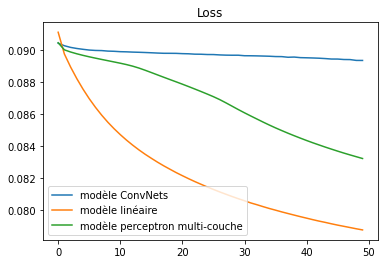

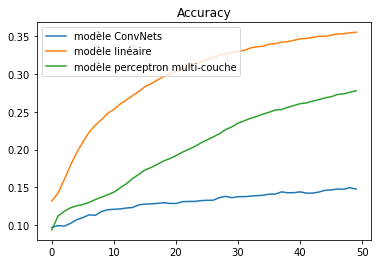

In [10]:
plot_all_logs(all_logs1)
#batchsize=500

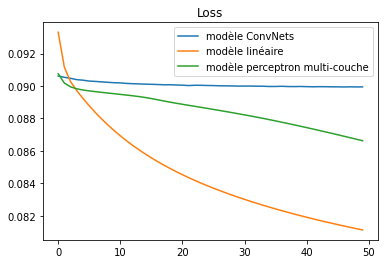

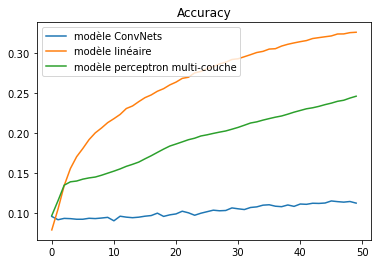

In [11]:
plot_all_logs(all_logs)
#batchsize=1000

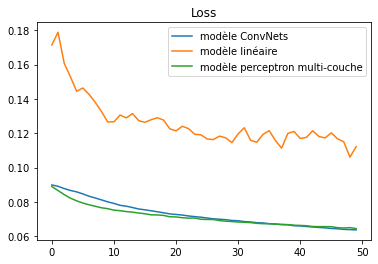

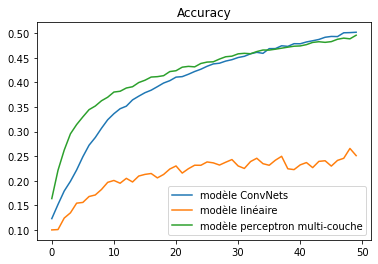

In [12]:
plot_all_logs(all_logs2)

avec un learning_rate plus fort (ici 1)on remarque clairement que les résultats sont plus intéréssant.

On a fait le choix de lancer 50 époques pour bien voir la différence entre les modèles.